In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('dataset_3.csv')
df.rename( columns=  {
    'Hours_Studied' : 'study',
    'Attendance_Rate' : 'attendance',
    'Sleep_Hours' : 'sleep',
    'Practice_Tests_Taken': 'tests',
    'Exam_Score' : 'score'
}, inplace=True)
df.head()

,study,attendance,sleep,tests,score
0,59.571811,9.603615,22.040853,58.921043,244.180306
1,73.733304,36.283481,30.727455,86.303344,276.904776
2,36.181427,39.246835,27.387595,55.253250,96.006786
3,55.974484,48.604918,17.019534,77.706794,150.720884
4,90.365226,42.548571,56.761125,67.016317,331.098607


In [3]:
x = df[['study', 'attendance', 'sleep', 'tests']].values.reshape(-1,4)
y = df['score'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)
jb.dump(sc, 'scaler_5.pkl')
yn = y.min()
yx = y.max()
y = (y-yn)/(yx - yn)

In [4]:
def score(study, attendance, sleep, tests) :
    model_path = 'five.keras'
    sc = jb.load('scaler_5.pkl')
    inp = np.array([[study, attendance, sleep, tests]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        lv = hist.history['loss']
        pred = model.predict(x)
        model.save('five.keras')
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.title('Actual vs Predicted')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx-yn)+yn

c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.6719
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5739
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4658
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3870
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3407
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3063
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2328
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2024
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1679
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1543
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1123
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1012
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0827
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0595
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0649
Epoch 16/500
4/4 ━━

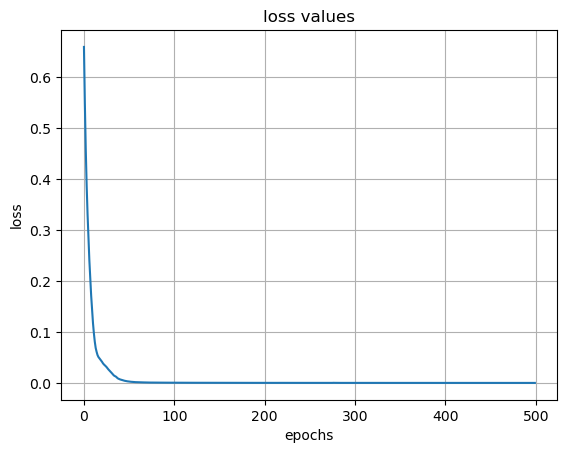

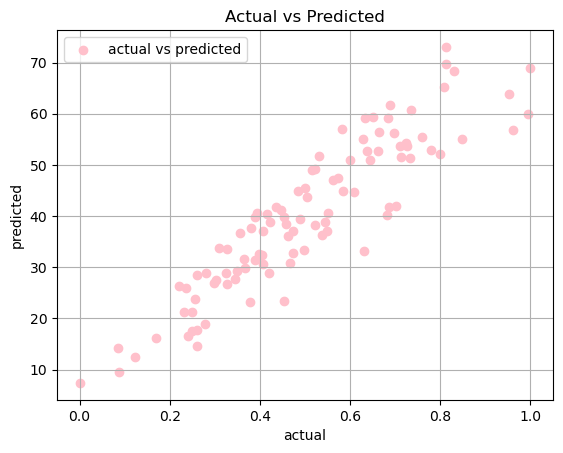

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
156.36657076964488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
77.4420129154334
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
26.54088306176412


In [5]:
print(score(41.14, 15.89, 20.69, 55.05))
print(score(17.79, 23.64, 18.48, 111.77))
print(score(14.60, 37.79, 23.77, 42.50))